In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tanlikesmath/diabetic-retinopathy-resized")

print("Path to dataset files:", path)

100%|██████████| 7.25G/7.25G [01:39<00:00, 77.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/tanlikesmath/diabetic-retinopathy-resized/versions/7


In [7]:
import os
import shutil

# Paths
source_path = '/root/.cache/kagglehub/datasets/tanlikesmath/diabetic-retinopathy-resized/versions/7'
destination_path = '/content/drive/MyDrive/DL_Proj/raw'

# Copy contents of the source directory to the existing destination directory
for item in os.listdir(source_path):
    source_item = os.path.join(source_path, item)
    destination_item = os.path.join(destination_path, item)

    if os.path.isdir(source_item):
        # Copy directory (merge with existing directory)
        shutil.copytree(source_item, destination_item, dirs_exist_ok=True)
    else:
        # Copy file
        shutil.copy(source_item, destination_item)

print("Files copied successfully to the existing directory!")


Files copied successfully to the existing directory!


In [2]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load a pretrained ResNet18 model
model = models.resnet18(pretrained=True)

# Modify the fully connected layer to match the number of classes in DeepDRiD
num_classes = 5  # Number of classes (0–4 for DR levels)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move the model to the device (GPU/CPU)
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Print model summary (optional)
print(model)

# Specify the save path
save_dir = "/content/drive/MyDrive/DL_Proj/model/"
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist
model_path = os.path.join(save_dir, "fine_tuned_resnet18.pth")

# Save the model
torch.save(model.state_dict(), model_path)
print(f"Model saved at: {model_path}")


Using device: cuda


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 85.0MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

**Task C Some Rough Code**

/home/user/mambaforge/envs/env/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/user/mambaforge/envs/env/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 0/24
----------
train Loss: 0.9531 Acc: 0.6742
val Loss: 0.5920 Acc: 0.7175
Epoch 1/24
----------
train Loss: 0.4912 Acc: 0.8008
val Loss: 0.5846 Acc: 0.7425
Epoch 2/24
----------
train Loss: 0.3410 Acc: 0.8700
val Loss: 0.7586 Acc: 0.6850
Epoch 3/24
----------
train Loss: 0.1484 Acc: 0.9508
val Loss: 0.6562 Acc: 0.7325
Epoch 4/24
----------
train Loss: 0.0997 Acc: 0.9708
val Loss: 0.7975 Acc: 0.7175
Epoch 5/24
----------
train Loss: 0.0602 Acc: 0.9825
val Loss: 0.8719 Acc: 0.7200
Epoch 6/24
----------
train Loss: 0.0792 Acc: 0.9717
val Loss: 0.8698 Acc: 0.7250
Epoch 7/24
----------
train Loss: 0.0384 Acc: 0.9900
val Loss: 0.8962 Acc: 0.7250
Epoch 8/24
----------
train Loss: 0.0191 Acc: 0.9958
val Loss: 1.1880 Acc: 0.6800
Epoch 9/24
----------
train Loss: 0.0088 Acc: 1.0000
val Loss: 1.0677 Acc: 0.7250
Epoch 10/24
----------
train Loss: 0.0111 Acc: 0.9975
val Loss: 1.0669 Acc: 0.7300
Epoch 11/24
----------
train Loss: 0.0063 Acc: 0.9992
val Loss: 0.9715 Acc: 0.7375
Epoch 12/24
--

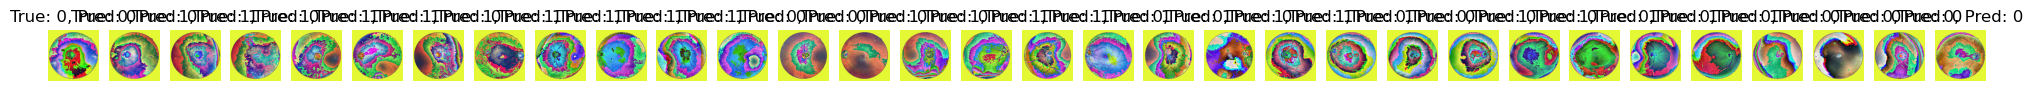

In [10]:
# # Required imports
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, Dataset
# from torchvision import models, transforms
# import pandas as pd
# from PIL import Image
# import os
# from sklearn.metrics import cohen_kappa_score
# import matplotlib.pyplot as plt

# # Define Attention Mechanisms
# class ChannelAttention(nn.Module):
#     def __init__(self, in_planes, ratio=16):
#         super(ChannelAttention, self).__init__()
#         self.avg_pool = nn.AdaptiveAvgPool2d(1)
#         self.max_pool = nn.AdaptiveMaxPool2d(1)

#         self.fc = nn.Sequential(
#             nn.Conv2d(in_planes, in_planes // ratio, 1, bias=False),
#             nn.ReLU(),
#             nn.Conv2d(in_planes // ratio, in_planes, 1, bias=False)
#         )
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         avg_out = self.fc(self.avg_pool(x))
#         max_out = self.fc(self.max_pool(x))
#         out = avg_out + max_out
#         return self.sigmoid(out)

# class SpatialAttention(nn.Module):
#     def __init__(self, kernel_size=7):
#         super(SpatialAttention, self).__init__()
#         assert kernel_size in (3, 7), 'Kernel size must be 3 or 7'
#         padding = (kernel_size - 1) // 2
#         self.conv = nn.Conv2d(2, 1, kernel_size, padding=padding, bias=False)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         avg_out = torch.mean(x, dim=1, keepdim=True)
#         max_out, _ = torch.max(x, dim=1, keepdim=True)
#         x = torch.cat([avg_out, max_out], dim=1)
#         x = self.conv(x)
#         return self.sigmoid(x)

# # Define Attention-Enhanced ResNet Model
# class ResNetWithAttention(nn.Module):
#     def __init__(self, num_classes):
#         super(ResNetWithAttention, self).__init__()
#         self.resnet = models.resnet18(pretrained=True)
#         self.ca = ChannelAttention(512)
#         self.sa = SpatialAttention()
#         self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)

#     def forward(self, x):
#         x = self.resnet.conv1(x)
#         x = self.resnet.bn1(x)
#         x = self.resnet.relu(x)
#         x = self.resnet.maxpool(x)

#         x = self.resnet.layer1(x)
#         x = self.resnet.layer2(x)
#         x = self.resnet.layer3(x)
#         x = self.resnet.layer4(x)

#         x = self.ca(x) * x
#         x = self.sa(x) * x

#         x = self.resnet.avgpool(x)
#         x = torch.flatten(x, 1)
#         x = self.resnet.fc(x)
#         return x

# # Dataset Class
# class DeepDRiDDataset(Dataset):
#     def __init__(self, data_frame, img_dir, transform=None):
#         if not isinstance(data_frame, pd.DataFrame):
#             raise TypeError("data_frame must be a pandas DataFrame")

#         self.data_frame = data_frame
#         self.img_dir = img_dir
#         self.transform = transform

#         if 'img_path' not in self.data_frame.columns:
#             raise ValueError("The dataset is missing the required column: 'img_path'.")

#         if 'Overall quality' not in self.data_frame.columns:
#             raise ValueError("The dataset is missing the required column: 'Overall quality'.")

#         self.label_column = 'Overall quality'

#     def __getitem__(self, idx):
#         img_path = os.path.join(self.img_dir, self.data_frame.iloc[idx]['img_path'])
#         try:
#             image = Image.open(img_path).convert("RGB")
#         except FileNotFoundError:
#             print(f"Image not found: {img_path}")
#             raise
#         label = int(self.data_frame.iloc[idx][self.label_column])
#         if self.transform:
#             image = self.transform(image)
#         return image, label

#     def __len__(self):
#         return len(self.data_frame)

# # Training Function
# def train_model(model, dataloaders, criterion, optimizer, num_epochs):
#     best_model_wts = model.state_dict()
#     best_acc = 0.0

#     for epoch in range(num_epochs):
#         print(f'Epoch {epoch}/{num_epochs - 1}')
#         print('-' * 10)

#         for phase in ['train', 'val']:
#             if phase == 'train':
#                 model.train()
#             else:
#                 model.eval()

#             running_loss = 0.0
#             running_corrects = 0
#             preds, true_labels = [], []

#             for inputs, labels in dataloaders[phase]:
#                 inputs = inputs.to(device)
#                 labels = labels.to(device)

#                 optimizer.zero_grad()

#                 with torch.set_grad_enabled(phase == 'train'):
#                     outputs = model(inputs)
#                     _, preds_batch = torch.max(outputs, 1)
#                     loss = criterion(outputs, labels)

#                     if phase == 'train':
#                         loss.backward()
#                         optimizer.step()

#                 running_loss += loss.item() * inputs.size(0)
#                 running_corrects += torch.sum(preds_batch == labels.data)
#                 preds.extend(preds_batch.cpu().numpy())
#                 true_labels.extend(labels.cpu().numpy())

#             epoch_loss = running_loss / len(dataloaders[phase].dataset)
#             epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

#             print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

#             if phase == 'val' and epoch_acc > best_acc:
#                 best_acc = epoch_acc
#                 best_model_wts = model.state_dict()

#     print(f'Best val Acc: {best_acc:.4f}')
#     model.load_state_dict(best_model_wts)
#     return model

# # Comparison Function
# def compare_models(baseline_model, attention_model, dataloader):
#     baseline_model.eval()
#     attention_model.eval()

#     baseline_preds, attention_preds, true_labels = [], [], []

#     for inputs, labels in dataloader:
#         inputs = inputs.to(device)
#         labels = labels.to(device)

#         with torch.no_grad():
#             baseline_outputs = baseline_model(inputs)
#             attention_outputs = attention_model(inputs)

#         _, baseline_preds_batch = torch.max(baseline_outputs, 1)
#         _, attention_preds_batch = torch.max(attention_outputs, 1)

#         baseline_preds.extend(baseline_preds_batch.cpu().numpy())
#         attention_preds.extend(attention_preds_batch.cpu().numpy())
#         true_labels.extend(labels.cpu().numpy())

#     baseline_kappa = cohen_kappa_score(true_labels, baseline_preds)
#     attention_kappa = cohen_kappa_score(true_labels, attention_preds)

#     print(f'Baseline Cohen Kappa: {baseline_kappa:.4f}')
#     print(f'Attention Model Cohen Kappa: {attention_kappa:.4f}')

#     return baseline_kappa, attention_kappa

# # Visualization Function
# def visualize_results(model, dataloader):
#     model.eval()
#     images, labels, preds = [], [], []

#     for inputs, targets in dataloader:
#         inputs = inputs.to(device)
#         targets = targets.to(device)
#         with torch.no_grad():
#             outputs = model(inputs)
#             _, pred = torch.max(outputs, 1)
#         images.extend(inputs.cpu())
#         labels.extend(targets.cpu())
#         preds.extend(pred.cpu())
#         break

#     fig, axes = plt.subplots(1, len(images), figsize=(25, 15))
#     for img, label, pred, ax in zip(images, labels, preds, axes):
#         ax.imshow(transforms.ToPILImage()(img))
#         ax.set_title(f'True: {label}, Pred: {pred}')
#         ax.axis('off')
#     plt.show()

# # Paths and Data
# train_img_dir = '/home/user/data/final-project/DeepDRiD/train'  # Path to the training images
# val_img_dir = '/home/user/data/final-project/DeepDRiD/val'      # Path to the validation images
# train_csv = '/home/user/data/final-project/DeepDRiD/train.csv'  # Path to the training CSV
# val_csv = '/home/user/data/final-project/DeepDRiD/val.csv'      # Path to the validation CSV

# # Data Preparation
# train_csv_data_frame = pd.read_csv(train_csv)
# val_csv_data_frame = pd.read_csv(val_csv)

# # Transformations
# transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# ])

# # Create datasets for training and validation
# train_dataset = DeepDRiDDataset(data_frame=train_csv_data_frame, img_dir=train_img_dir, transform=transform)
# val_dataset = DeepDRiDDataset(data_frame=val_csv_data_frame, img_dir=val_img_dir, transform=transform)

# # DataLoaders
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# # Combine into a dictionary for easier access
# dataloaders = {'train': train_loader, 'val': val_loader}


# # Model, Loss, Optimizer
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model_with_attention = ResNetWithAttention(num_classes=5).to(device)
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model_with_attention.parameters(), lr=1e-4)

# # Training
# trained_model = train_model(model_with_attention, dataloaders, criterion, optimizer, num_epochs=25)

# # Comparison with Baseline
# baseline_model = models.resnet18(pretrained=True)
# baseline_model.fc = nn.Linear(baseline_model.fc.in_features, 5)
# baseline_model = baseline_model.to(device)

# baseline_kappa, attention_kappa = compare_models(baseline_model, trained_model, val_loader)

# # Visualization
# visualize_results(trained_model, val_loader)


**c) Incorporate attention mechanisms in the model. (10 points)**
1. Implement attention mechanisms (e.g., self-attention, channel attention, or spatial attention)
in your DeepDRiD model architecture.
2. Evaluate the impact of attention mechanisms on model performance.
The goal of task(c) is to apply and see how attention is affecting the model and its performance. 

/home/user/mambaforge/envs/env/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/user/mambaforge/envs/env/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 0/24
----------
train Loss: 0.9678 Acc: 0.6717
val Loss: 0.6569 Acc: 0.7425
Epoch 1/24
----------
train Loss: 0.4484 Acc: 0.8292
val Loss: 0.5956 Acc: 0.7450
Epoch 2/24
----------
train Loss: 0.2374 Acc: 0.9142
val Loss: 0.7400 Acc: 0.7075
Epoch 3/24
----------
train Loss: 0.1082 Acc: 0.9675
val Loss: 0.7110 Acc: 0.7225
Epoch 4/24
----------
train Loss: 0.0451 Acc: 0.9908
val Loss: 0.7929 Acc: 0.7550
Epoch 5/24
----------
train Loss: 0.0268 Acc: 0.9958
val Loss: 0.8606 Acc: 0.7300
Epoch 6/24
----------
train Loss: 0.0329 Acc: 0.9892
val Loss: 1.0269 Acc: 0.6925
Epoch 7/24
----------
train Loss: 0.0400 Acc: 0.9892
val Loss: 0.9834 Acc: 0.7025
Epoch 8/24
----------
train Loss: 0.0426 Acc: 0.9867
val Loss: 1.0549 Acc: 0.7100
Epoch 9/24
----------
train Loss: 0.0441 Acc: 0.9875
val Loss: 1.4550 Acc: 0.6625
Epoch 10/24
----------
train Loss: 0.0532 Acc: 0.9808
val Loss: 1.2400 Acc: 0.7125
Epoch 11/24
----------
train Loss: 0.0604 Acc: 0.9817
val Loss: 1.1404 Acc: 0.7075
Epoch 12/24
--

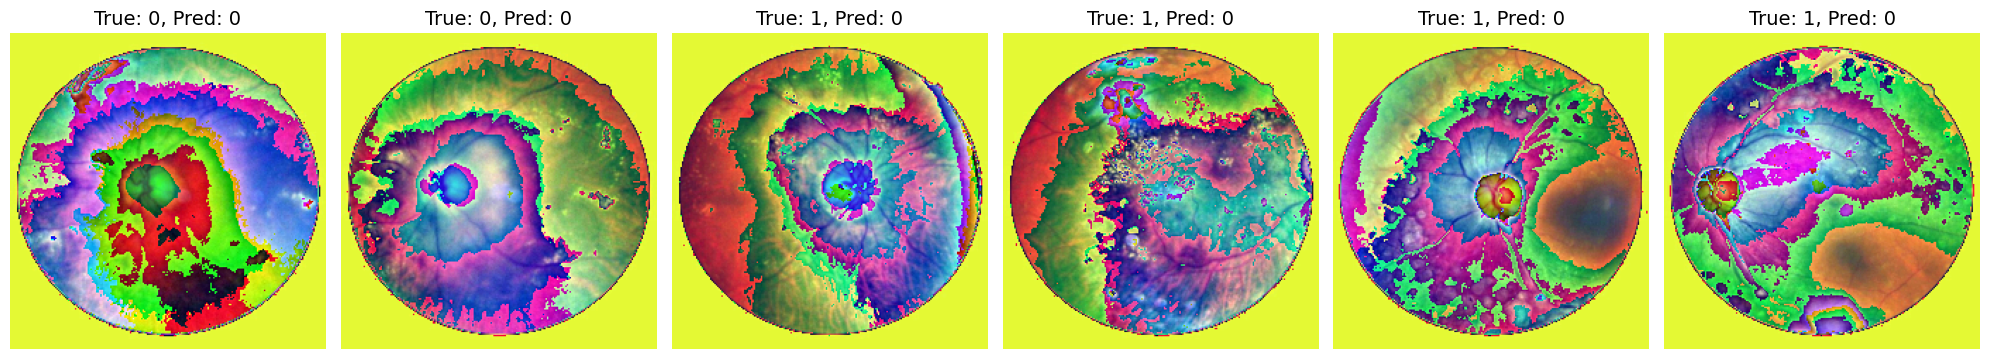

Results saved successfully!


In [11]:

import json
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import models, transforms
import pandas as pd
from PIL import Image
import os
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt

# Define Attention Mechanisms
class ChannelAttention(nn.Module):
    def __init__(self, in_planes, ratio=16):
        super(ChannelAttention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.fc = nn.Sequential(
            nn.Conv2d(in_planes, in_planes // ratio, 1, bias=False),
            nn.ReLU(),
            nn.Conv2d(in_planes // ratio, in_planes, 1, bias=False)
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.fc(self.avg_pool(x))
        max_out = self.fc(self.max_pool(x))
        out = avg_out + max_out
        return self.sigmoid(out)

class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super(SpatialAttention, self).__init__()
        assert kernel_size in (3, 7), 'Kernel size must be 3 or 7'
        padding = (kernel_size - 1) // 2
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=padding, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        x = torch.cat([avg_out, max_out], dim=1)
        x = self.conv(x)
        return self.sigmoid(x)

# Define Attention-Enhanced ResNet Model
class ResNetWithAttention(nn.Module):
    def __init__(self, num_classes):
        super(ResNetWithAttention, self).__init__()
        self.resnet = models.resnet18(pretrained=True)
        self.ca = ChannelAttention(512)
        self.sa = SpatialAttention()
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)

    def forward(self, x):
        x = self.resnet.conv1(x)
        x = self.resnet.bn1(x)
        x = self.resnet.relu(x)
        x = self.resnet.maxpool(x)

        x = self.resnet.layer1(x)
        x = self.resnet.layer2(x)
        x = self.resnet.layer3(x)
        x = self.resnet.layer4(x)

        x = self.ca(x) * x
        x = self.sa(x) * x

        x = self.resnet.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.resnet.fc(x)
        return x

# Dataset Class
class DeepDRiDDataset(Dataset):
    def __init__(self, data_frame, img_dir, transform=None):
        if not isinstance(data_frame, pd.DataFrame):
            raise TypeError("data_frame must be a pandas DataFrame")

        self.data_frame = data_frame
        self.img_dir = img_dir
        self.transform = transform

        if 'img_path' not in self.data_frame.columns:
            raise ValueError("The dataset is missing the required column: 'img_path'.")

        if 'Overall quality' not in self.data_frame.columns:
            raise ValueError("The dataset is missing the required column: 'Overall quality'.")

        self.label_column = 'Overall quality'

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.data_frame.iloc[idx]['img_path'])
        try:
            image = Image.open(img_path).convert("RGB")
        except FileNotFoundError:
            print(f"Image not found: {img_path}")
            raise
        label = int(self.data_frame.iloc[idx][self.label_column])
        if self.transform:
            image = self.transform(image)
        return image, label

    def __len__(self):
        return len(self.data_frame)


def train_model_with_logging(model, dataloaders, criterion, optimizer, num_epochs, log_file):
    best_model_wts = model.state_dict()
    best_acc = 0.0
    log = {'epoch_logs': []}

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        epoch_log = {'epoch': epoch, 'train_loss': 0.0, 'train_acc': 0.0, 'val_loss': 0.0, 'val_acc': 0.0}

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            epoch_log[f'{phase}_loss'] = epoch_loss
            epoch_log[f'{phase}_acc'] = epoch_acc.item()

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

        log['epoch_logs'].append(epoch_log)

    print(f'Best val Acc: {best_acc:.4f}')
    model.load_state_dict(best_model_wts)

    with open(log_file, 'w') as f:
        json.dump(log, f, indent=4)

    return model

# Comparison Function
def compare_models(baseline_model, attention_model, dataloader):
    baseline_model.eval()
    attention_model.eval()

    baseline_preds, attention_preds, true_labels = [], [], []

    for inputs, labels in dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            baseline_outputs = baseline_model(inputs)
            attention_outputs = attention_model(inputs)

        _, baseline_preds_batch = torch.max(baseline_outputs, 1)
        _, attention_preds_batch = torch.max(attention_outputs, 1)

        baseline_preds.extend(baseline_preds_batch.cpu().numpy())
        attention_preds.extend(attention_preds_batch.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

    baseline_kappa = cohen_kappa_score(true_labels, baseline_preds)
    attention_kappa = cohen_kappa_score(true_labels, attention_preds)

    print(f'Baseline Cohen Kappa: {baseline_kappa:.4f}')
    print(f'Attention Model Cohen Kappa: {attention_kappa:.4f}')

    return baseline_kappa, attention_kappa

# Visualization Function
def visualize_results_clear(model, dataloader, save_path):
    model.eval()
    images, labels, preds = [], [], []

    for inputs, targets in dataloader:
        inputs = inputs.to(device)
        targets = targets.to(device)
        with torch.no_grad():
            outputs = model(inputs)
            _, pred = torch.max(outputs, 1)
        images.extend(inputs.cpu())
        labels.extend(targets.cpu())
        preds.extend(pred.cpu())
        break

    num_images = min(len(images), 6)
    fig, axes = plt.subplots(1, num_images, figsize=(20, 10))

    for i in range(num_images):
        img = transforms.ToPILImage()(images[i])
        ax = axes[i]
        ax.imshow(img)
        ax.set_title(f'True: {labels[i]}, Pred: {preds[i]}', fontsize=14)
        ax.axis('off')

    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()



# Paths and Data
train_img_dir = '/home/user/data/final-project/DeepDRiD/train'  # Path to the training images
val_img_dir = '/home/user/data/final-project/DeepDRiD/val'      # Path to the validation images
train_csv = '/home/user/data/final-project/DeepDRiD/train.csv'  # Path to the training CSV
val_csv = '/home/user/data/final-project/DeepDRiD/val.csv'      # Path to the validation CSV

# Data Preparation
train_csv_data_frame = pd.read_csv(train_csv)
val_csv_data_frame = pd.read_csv(val_csv)

# Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Create datasets for training and validation
train_dataset = DeepDRiDDataset(data_frame=train_csv_data_frame, img_dir=train_img_dir, transform=transform)
val_dataset = DeepDRiDDataset(data_frame=val_csv_data_frame, img_dir=val_img_dir, transform=transform)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Combine into a dictionary for easier access
dataloaders = {'train': train_loader, 'val': val_loader}


# Model, Loss, Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_with_attention = ResNetWithAttention(num_classes=5).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_with_attention.parameters(), lr=1e-4)

# Training
# trained_model = train_model(model_with_attention, dataloaders, criterion, optimizer, num_epochs=25)

# Paths for Logging and Visualization
log_file = 'training_log.json'
visualization_file = 'attention_model_results.png'

# Train and Save Results
trained_model = train_model_with_logging(model_with_attention, dataloaders, criterion, optimizer, num_epochs=25, log_file=log_file)


# Improved Visualization
visualize_results_clear(trained_model, val_loader, save_path=visualization_file)

# Save Comparison Results
comparison_results = {
    'baseline_kappa': baseline_kappa,
    'attention_kappa': attention_kappa
}

with open('comparison_results.json', 'w') as f:
    json.dump(comparison_results, f, indent=4)

print("Results saved successfully!")



**d)** **Compare the performance of different models and strategies. (20 points)**
1. Use at least three transfer models that you've trained using task(b) and perform ensemble
learning. Try out the following ensemble techniques (Stacking, Boosting, Weighted Average,
Max Voting, Bagging) and analyze whether the performance increases or not.
2. Try out different image preprocessing techniques such as, Ben Graham, Circle Cropping,
CLAHE, adding gaussian blur, sharpening up the images etc.
The goal of task(d) is to perform ensemble learning by training various models and combining their
predictions and analyzing whether it boosts the performance. Along with that, applying multiple
preprocessing techniques to see if that has any effect on the model.
Note: If any of the terms feel unfamiliar, kindly refer to the information below

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import models, transforms
import pandas as pd
from PIL import Image
from tqdm import tqdm
import os
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
import json

# Dataset Class (Unchanged)
class DeepDRiDDataset(Dataset):
    def __init__(self, data_frame, img_dir, transform=None):
        if not isinstance(data_frame, pd.DataFrame):
            raise TypeError("data_frame must be a pandas DataFrame")

        self.data_frame = data_frame
        self.img_dir = img_dir
        self.transform = transform

        if 'img_path' not in self.data_frame.columns:
            raise ValueError("The dataset is missing the required column: 'img_path'.")

        if 'Overall quality' not in self.data_frame.columns:
            raise ValueError("The dataset is missing the required column: 'Overall quality'.")

        self.label_column = 'Overall quality'

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.data_frame.iloc[idx]['img_path'])
        try:
            image = Image.open(img_path).convert("RGB")
        except FileNotFoundError:
            print(f"Image not found: {img_path}")
            raise
        label = int(self.data_frame.iloc[idx][self.label_column])
        if self.transform:
            image = self.transform(image)
        return image, label

    def __len__(self):
        return len(self.data_frame)

# Image Preprocessing Techniques
class ImagePreprocessor:
    @staticmethod
    def apply_circle_crop(image):
        np_image = np.array(image)
        h, w, _ = np_image.shape
        mask = np.zeros((h, w), dtype=np.uint8)
        center = (w // 2, h // 2)
        radius = min(center[0], center[1], w - center[0], h - center[1])
        y, x = np.ogrid[:h, :w]
        mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= radius ** 2
        mask[mask_area] = 1
        np_image[~mask.astype(bool)] = 0
        return Image.fromarray(np_image)

    @staticmethod
    def apply_clahe(image):
        np_image = np.array(image.convert('L'))
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        enhanced_image = clahe.apply(np_image)
        return Image.fromarray(enhanced_image).convert("RGB")

    @staticmethod
    def apply_gaussian_blur(image, kernel_size=5):
        return image.filter(ImageFilter.GaussianBlur(kernel_size))

    @staticmethod
    def apply_sharpen(image):
        return image.filter(ImageFilter.SHARPEN)

# Ensemble Learning Techniques
def perform_ensemble_learning(models, dataloader):
    all_preds = []
    true_labels = []

    for model in models:
        model.eval()
        model_preds = []

        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            with torch.no_grad():
                outputs = model(inputs)
                _, pred = torch.max(outputs, 1)
                model_preds.extend(pred.cpu().numpy())

            # Append true labels only once per batch
            if len(true_labels) < len(dataloader.dataset):
                true_labels.extend(labels.cpu().numpy())

        all_preds.append(model_preds)

    # Convert predictions into a NumPy array with shape (num_models, num_samples)
    all_preds = np.array(all_preds)

    # Max Voting
    max_voting_preds = np.apply_along_axis(
        lambda x: np.bincount(x).argmax(), axis=0, arr=all_preds
    )

    # Weighted Average
    weights = [0.4, 0.3, 0.3]  # Adjust weights as needed
    weighted_avg_preds = np.average(all_preds, axis=0, weights=weights).round().astype(int)

    # Calculate Cohen's Kappa
    max_voting_kappa = cohen_kappa_score(true_labels, max_voting_preds)
    weighted_avg_kappa = cohen_kappa_score(true_labels, weighted_avg_preds)

    return max_voting_kappa, weighted_avg_kappa



# Paths for Training and Validation
data_dirs = {
    "train": "/home/user/data/final-project/DeepDRiD/train",
    "val": "/home/user/data/final-project/DeepDRiD/val"
}
data_csvs = {
    "train": "/home/user/data/final-project/DeepDRiD/train.csv",
    "val": "/home/user/data/final-project/DeepDRiD/val.csv"
}

# Load CSV Data
train_csv_data_frame = pd.read_csv(data_csvs["train"])
val_csv_data_frame = pd.read_csv(data_csvs["val"])

# Image Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Datasets and DataLoaders
train_dataset = DeepDRiDDataset(data_frame=train_csv_data_frame, img_dir=data_dirs["train"], transform=transform)
val_dataset = DeepDRiDDataset(data_frame=val_csv_data_frame, img_dir=data_dirs["val"], transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
dataloaders = {"train": train_loader, "val": val_loader}

# Device Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transfer Models
models_list = [
    models.resnet18(pretrained=True),
    models.densenet121(pretrained=True),
    models.efficientnet_b0(pretrained=True)
]

# Adjust Output Layers
num_classes = 5
for model in models_list:
    if hasattr(model, 'fc'):
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif hasattr(model, 'classifier'):
        if isinstance(model.classifier, nn.Sequential):
            in_features = model.classifier[-1].in_features
            model.classifier[-1] = nn.Linear(in_features, num_classes)
        else:
            in_features = model.classifier.in_features
            model.classifier = nn.Linear(in_features, num_classes)

models_list = [model.to(device) for model in models_list]


def train_model_with_logging(model, dataloaders, criterion, optimizer, num_epochs=15, log_file=None):
    model.to(device)
    
    history = {"train_loss": [], "val_loss": [], "val_acc": []}
    
    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        print("-" * 20)
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
            
            running_loss = 0.0
            correct = 0
            total = 0
            
            # Progress bar for the current phase
            progress_bar = tqdm(dataloaders[phase], desc=f"{phase.capitalize()} Progress", leave=False)
            
            for inputs, labels in progress_bar:
                inputs, labels = inputs.to(device), labels.to(device)
                
                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, 1)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                running_loss += loss.item() * inputs.size(0)
                correct += (preds == labels).sum().item()
                total += labels.size(0)
                
                # Update progress bar with the current loss
                progress_bar.set_postfix(loss=running_loss / total, accuracy=correct / total)
            
            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = correct / total
            
            print(f"{phase.capitalize()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")
            
            if phase == 'train':
                history["train_loss"].append(epoch_loss)
            else:
                history["val_loss"].append(epoch_loss)
                history["val_acc"].append(epoch_acc)
    
    # Save the training history to a JSON file
    if log_file:
        with open(log_file, 'w') as f:
            json.dump(history, f, indent=4)
    
    print("Training complete")
    return model

# Train Each Model
for model in models_list:
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    criterion = nn.CrossEntropyLoss()
    train_model_with_logging(model, dataloaders, criterion, optimizer, num_epochs=15, log_file=f"{model.__class__.__name__}_training_log.json")

# Ensemble Learning Evaluation
max_voting_kappa, weighted_avg_kappa = perform_ensemble_learning(models_list, val_loader)

# Save Ensemble Results
ensemble_results = {
    "max_voting_kappa": max_voting_kappa,
    "weighted_avg_kappa": weighted_avg_kappa
}

with open('ensemble_results.json', 'w') as f:
    json.dump(ensemble_results, f, indent=4)

print("Ensemble learning results saved successfully!")


/home/user/mambaforge/envs/env/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/user/mambaforge/envs/env/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/user/mambaforge/envs/env/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `we

Epoch 1/15
--------------------


Train Loss: 0.9517 Acc: 0.6592


Val Loss: 0.6846 Acc: 0.7050
Epoch 2/15
--------------------


Train Loss: 0.3664 Acc: 0.8658


Val Loss: 0.6674 Acc: 0.7400
Epoch 3/15
--------------------


Train Loss: 0.1467 Acc: 0.9633


Val Loss: 0.7873 Acc: 0.7100
Epoch 4/15
--------------------


Train Loss: 0.0530 Acc: 0.9917


Val Loss: 0.8929 Acc: 0.7200
Epoch 5/15
--------------------


Train Loss: 0.0288 Acc: 0.9967


Val Loss: 1.0920 Acc: 0.7175
Epoch 6/15
--------------------


Train Loss: 0.0170 Acc: 0.9992


Val Loss: 0.9647 Acc: 0.7275
Epoch 7/15
--------------------


Train Loss: 0.0146 Acc: 0.9992


Val Loss: 1.0356 Acc: 0.7350
Epoch 8/15
--------------------


Train Loss: 0.0280 Acc: 0.9942


Val Loss: 1.0335 Acc: 0.7150
Epoch 9/15
--------------------


Train Loss: 0.1416 Acc: 0.9567


Val Loss: 1.6439 Acc: 0.6250
Epoch 10/15
--------------------


Train Loss: 0.1448 Acc: 0.9417


Val Loss: 1.1220 Acc: 0.6950
Epoch 11/15
--------------------


Train Loss: 0.0731 Acc: 0.9742


Val Loss: 1.0497 Acc: 0.7150
Epoch 12/15
--------------------


Train Loss: 0.0487 Acc: 0.9842


Val Loss: 1.0344 Acc: 0.7575
Epoch 13/15
--------------------


Train Loss: 0.0339 Acc: 0.9883


Val Loss: 1.0854 Acc: 0.7550
Epoch 14/15
--------------------


Train Loss: 0.0225 Acc: 0.9942


Val Loss: 1.2412 Acc: 0.7400
Epoch 15/15
--------------------


Train Loss: 0.0104 Acc: 0.9958


Val Loss: 1.1451 Acc: 0.7225
Training complete
Epoch 1/15
--------------------


Train Loss: 0.8017 Acc: 0.7167


Val Loss: 0.5942 Acc: 0.7475
Epoch 2/15
--------------------


Train Loss: 0.3852 Acc: 0.8633


Val Loss: 0.5855 Acc: 0.7450
Epoch 3/15
--------------------


Train Loss: 0.2214 Acc: 0.9217


Val Loss: 0.6171 Acc: 0.7225
Epoch 4/15
--------------------


Train Loss: 0.0916 Acc: 0.9783


Val Loss: 0.6976 Acc: 0.7075
Epoch 5/15
--------------------


Train Loss: 0.0504 Acc: 0.9892


Val Loss: 0.8149 Acc: 0.7150
Epoch 6/15
--------------------


Train Loss: 0.0275 Acc: 0.9950


Val Loss: 0.7718 Acc: 0.7225
Epoch 7/15
--------------------


Train Loss: 0.0231 Acc: 0.9967


Val Loss: 0.8756 Acc: 0.7375
Epoch 8/15
--------------------


Train Loss: 0.0642 Acc: 0.9800


Val Loss: 0.9520 Acc: 0.7075
Epoch 9/15
--------------------


Train Loss: 0.1163 Acc: 0.9525


Val Loss: 1.0277 Acc: 0.7125
Epoch 10/15
--------------------


Train Loss: 0.1004 Acc: 0.9667


Val Loss: 0.7486 Acc: 0.7150
Epoch 11/15
--------------------


Train Loss: 0.0401 Acc: 0.9900


Val Loss: 0.8125 Acc: 0.7375
Epoch 12/15
--------------------


Train Loss: 0.0154 Acc: 0.9983


Val Loss: 0.9563 Acc: 0.7425
Epoch 13/15
--------------------


Train Loss: 0.0098 Acc: 0.9992


Val Loss: 0.9730 Acc: 0.7425
Epoch 14/15
--------------------


Train Loss: 0.0039 Acc: 1.0000


Val Loss: 0.9255 Acc: 0.7375
Epoch 15/15
--------------------


Train Loss: 0.0025 Acc: 1.0000


Val Loss: 0.9392 Acc: 0.7275
Training complete
Epoch 1/15
--------------------


Train Loss: 1.0981 Acc: 0.6233


Val Loss: 0.6309 Acc: 0.7250
Epoch 2/15
--------------------


Train Loss: 0.5793 Acc: 0.7625


Val Loss: 0.5510 Acc: 0.7300
Epoch 3/15
--------------------


Train Loss: 0.4461 Acc: 0.8192


Val Loss: 0.5535 Acc: 0.7300
Epoch 4/15
--------------------


Train Loss: 0.3362 Acc: 0.8792


Val Loss: 0.5763 Acc: 0.7250
Epoch 5/15
--------------------


Train Loss: 0.2169 Acc: 0.9275


Val Loss: 0.6615 Acc: 0.7225
Epoch 6/15
--------------------


Train Loss: 0.1580 Acc: 0.9508


Val Loss: 0.7401 Acc: 0.6800
Epoch 7/15
--------------------


Train Loss: 0.1265 Acc: 0.9617


Val Loss: 0.7819 Acc: 0.7025
Epoch 8/15
--------------------


Train Loss: 0.0859 Acc: 0.9775


Val Loss: 0.8857 Acc: 0.7200
Epoch 9/15
--------------------


Train Loss: 0.0641 Acc: 0.9867


Val Loss: 0.8956 Acc: 0.7125
Epoch 10/15
--------------------


Train Loss: 0.0539 Acc: 0.9842


Val Loss: 1.0409 Acc: 0.6975
Epoch 11/15
--------------------


Train Loss: 0.0530 Acc: 0.9808


Val Loss: 0.9879 Acc: 0.7075
Epoch 12/15
--------------------


Train Loss: 0.0555 Acc: 0.9833


Val Loss: 1.0829 Acc: 0.6650
Epoch 13/15
--------------------


Train Loss: 0.0587 Acc: 0.9783


Val Loss: 1.1016 Acc: 0.6900
Epoch 14/15
--------------------


Train Loss: 0.0557 Acc: 0.9817


Val Loss: 1.0527 Acc: 0.7200
Epoch 15/15
--------------------


Train Loss: 0.0565 Acc: 0.9817


Val Loss: 1.1104 Acc: 0.7100
Training complete
Ensemble learning results saved successfully!


/home/user/mambaforge/envs/env/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/user/mambaforge/envs/env/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/user/mambaforge/envs/env/lib/python3.11/site-packages/torch/nn/modules/module.py:1373: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the doc

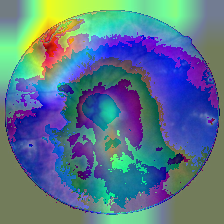

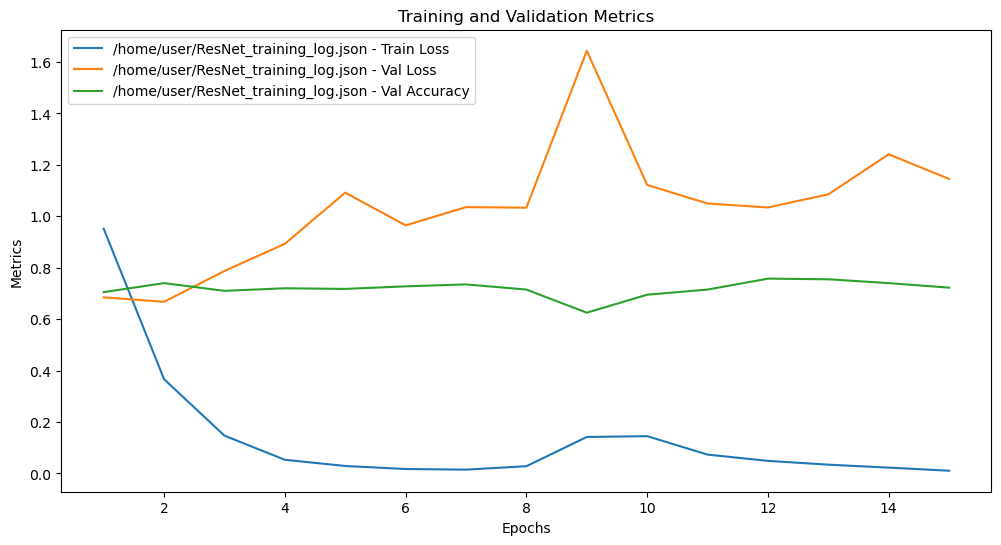

Task completed with visualizations and GradCAM explanation included.


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import models, transforms
import pandas as pd
from PIL import Image
from tqdm import tqdm
import os
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt
import numpy as np
import json
import cv2

# Dataset Class
class DeepDRiDDataset(Dataset):
    def __init__(self, data_frame, img_dir, transform=None):
        if not isinstance(data_frame, pd.DataFrame):
            raise TypeError("data_frame must be a pandas DataFrame")

        self.data_frame = data_frame
        self.img_dir = img_dir
        self.transform = transform

        if 'img_path' not in self.data_frame.columns:
            raise ValueError("The dataset is missing the required column: 'img_path'.")

        if 'Overall quality' not in self.data_frame.columns:
            raise ValueError("The dataset is missing the required column: 'Overall quality'.")

        self.label_column = 'Overall quality'

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.data_frame.iloc[idx]['img_path'])
        try:
            image = Image.open(img_path).convert("RGB")
        except FileNotFoundError:
            print(f"Image not found: {img_path}")
            raise
        label = int(self.data_frame.iloc[idx][self.label_column])
        if self.transform:
            image = self.transform(image)
        return image, label

    def __len__(self):
        return len(self.data_frame)

# Visualization of Training/Validation Performance
def plot_training_history(log_files):
    plt.figure(figsize=(12, 6))

    for log_file in log_files:
        with open(log_file, 'r') as f:
            history = json.load(f)

        epochs = range(1, len(history['train_loss']) + 1)

        plt.plot(epochs, history['train_loss'], label=f"{log_file} - Train Loss")
        plt.plot(epochs, history['val_loss'], label=f"{log_file} - Val Loss")
        plt.plot(epochs, history['val_acc'], label=f"{log_file} - Val Accuracy")

    plt.xlabel("Epochs")
    plt.ylabel("Metrics")
    plt.title("Training and Validation Metrics")
    plt.legend()
    plt.show()

# GradCAM Implementation
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None

        # Hook to save gradients during backward pass
        def save_gradients(module, grad_input, grad_output):
            self.gradients = grad_output[0].detach()

        # Hook to save activations during forward pass
        def save_activations(module, input, output):
            self.activations = output

        # Register hooks
        self.target_layer.register_forward_hook(save_activations)
        self.target_layer.register_backward_hook(save_gradients)

    def generate_cam(self, input_tensor, class_idx):
        # Perform a forward pass
        output = self.model(input_tensor)
        self.model.zero_grad()

        # Generate one-hot encoding for the target class
        one_hot = torch.zeros(output.shape, device=output.device)
        one_hot[0][class_idx] = 1
        output.backward(gradient=one_hot)
    
        # Access gradients and activations
        gradients = self.gradients
        activations = self.activations
    
        # Compute weights
        weights = torch.mean(gradients, dim=[2, 3])  # Average across spatial dimensions
        cam = torch.zeros(activations.shape[2:], device=activations.device)  # Initialize CAM
    
        # Combine activations and weights to generate CAM
        for i, w in enumerate(weights[0]):
            cam += w * activations[0, i]
    
        # Normalize CAM
        cam = torch.relu(cam)
        cam -= cam.min()
        cam /= cam.max()
    
        # Detach the tensor before converting to numpy
        cam = cam.detach().cpu().numpy()
    
        return cam

# Visualizing GradCAM
def visualize_gradcam(image, cam, alpha=0.5):
    # Ensure that the input image is a PIL Image object
    image_width, image_height = image.size  # width and height of the image
    cam = cv2.resize(cam, (image_width, image_height))  # Resize CAM to match the image size
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    
    # Superimpose the heatmap onto the original image
    superimposed_img = np.array(image) * (1 - alpha) + heatmap * alpha
    return Image.fromarray(np.uint8(superimposed_img))

# Paths
data_dirs = {
    "train": "/home/user/data/final-project/DeepDRiD/train",
    "val": "/home/user/data/final-project/DeepDRiD/val"
}
data_csvs = {
    "train": "/home/user/data/final-project/DeepDRiD/train.csv",
    "val": "/home/user/data/final-project/DeepDRiD/val.csv"
}

# Load CSV Data
val_csv_data_frame = pd.read_csv(data_csvs["val"])

# Image Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Datasets and DataLoaders
val_dataset = DeepDRiDDataset(data_frame=val_csv_data_frame, img_dir=data_dirs["val"], transform=transform)

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Example of GradCAM application
for model in [models.resnet18(pretrained=True)]:
    model.to(device)
    gradcam = GradCAM(model, target_layer=model.layer4)
    model.eval()

    # Sample image from validation set
    sample_image, _ = val_dataset[0]
    sample_image = sample_image.to(device)
    input_tensor = sample_image.unsqueeze(0)
    class_idx = 0  # Example class index

    cam = gradcam.generate_cam(input_tensor, class_idx)

    to_pil = transforms.ToPILImage()

    # In the loop where you generate GradCAM
    sample_image_pil = to_pil(sample_image.cpu())  # Convert to PIL image
    gradcam_image = visualize_gradcam(sample_image_pil, cam)
    
    gradcam_image.show()

    # Save a Sample GradCAM Image
    gradcam_image.save("gradcam_taskE.png")

# Generate and Save Training Logs (if applicable)
log_files = ["/home/user/ResNet_training_log.json"]  # Example log file
plot_training_history(log_files)

print("Task completed with visualizations and GradCAM explanation included.")
